In [5]:
import os
import glob
import csv
from datetime import datetime

# 创建结果文件名
now = datetime.now()
date_string = now.strftime("%Y-%m-%d")
result_filename = f"result_avg_accs_tag_{date_string}.csv"

# 遍历子目录下的txt文件并读取数据
root_folder = "./results_ViT_ATT_5splits_cifar100_224"  # 您需要替换为实际的根文件夹路径
data_dict = {}

max_columns = 0  # 最大列数

for foldername, subfolders, filenames in os.walk(root_folder):
    if "results" in subfolders:
        result_folder = os.path.join(foldername, "results")
        # 查找最新创建日期的txt文件
        txt_files = glob.glob(os.path.join(result_folder, "avg_accs_tag-*.txt"))

        if txt_files:
            latest_file = max(txt_files, key=os.path.getctime)
            with open(latest_file, 'r') as file:
                data = file.readlines()
                data_values = [float(val.strip()) for line in data for val in line.split("\t")]

                max_columns = max(max_columns, len(data_values))  # 更新最大列数

            folder_name = os.path.basename(foldername)
            data_dict[folder_name] = data_values

# 写入CSV文件
with open(result_filename, mode='w', newline='') as file:
    writer = csv.writer(file)

    # 写入表头
    header = ['Method'] + list(range(1, max_columns+1))
    writer.writerow(header)

    # 写入数据
    for folder_name, values in data_dict.items():
        row_values = [folder_name] + values + [None]*(max_columns-len(values))  # 添加空值以达到最大列数
        writer.writerow(row_values)

import pandas as pd

# 读取CSV文件
df = pd.read_csv(result_filename)

# 按最后一列从大到小排序
df_sorted = df.sort_values(by=df.columns[-1], ascending=False)

# 输出排序结果到屏幕上
print(df_sorted)


                                               Method       1        2  \
43  cifar100_224_olwf_asym_original_RD_VIT_VIT+RD_...  0.9485  0.85925   
44  cifar100_224_olwf_asym_original_RD_VIT_VIT+RD_...  0.9485  0.86225   
45  cifar100_224_olwf_asym_original_RD_VIT_VIT+RD_...  0.9485  0.86125   
42  cifar100_224_olwf_asym_original_RD_VIT_VIT+RD_...  0.9485  0.86700   
40  cifar100_224_olwf_asym_original_RD_VIT_VIT+RD_...  0.9485  0.86575   
41  cifar100_224_olwf_asym_original_RD_VIT_VIT+RD_...  0.9485  0.86600   
27       cifar100_224_icarl_5epoch_0713icarl_exampler  0.9450  0.85525   
25                    cifar100_224_lwf_5epoch_0713lwf  0.9485  0.86025   
38  cifar100_224_olwf_asym_original_RD_VIT_VIT+RD_...  0.9485  0.86650   
10  cifar100_224_olwf_asym_original_RD_VIT_VIT+RD_...  0.9485  0.86075   
6   cifar100_224_olwf_asym_original_RD_VIT_VIT+RD_...  0.9485  0.86100   
9   cifar100_224_olwf_asym_original_RD_VIT_VIT+RD_...  0.9485  0.86100   
11  cifar100_224_olwf_asym_original_RD

In [6]:
# pip install seaborn

In [7]:
# pip install mplcyberpunk


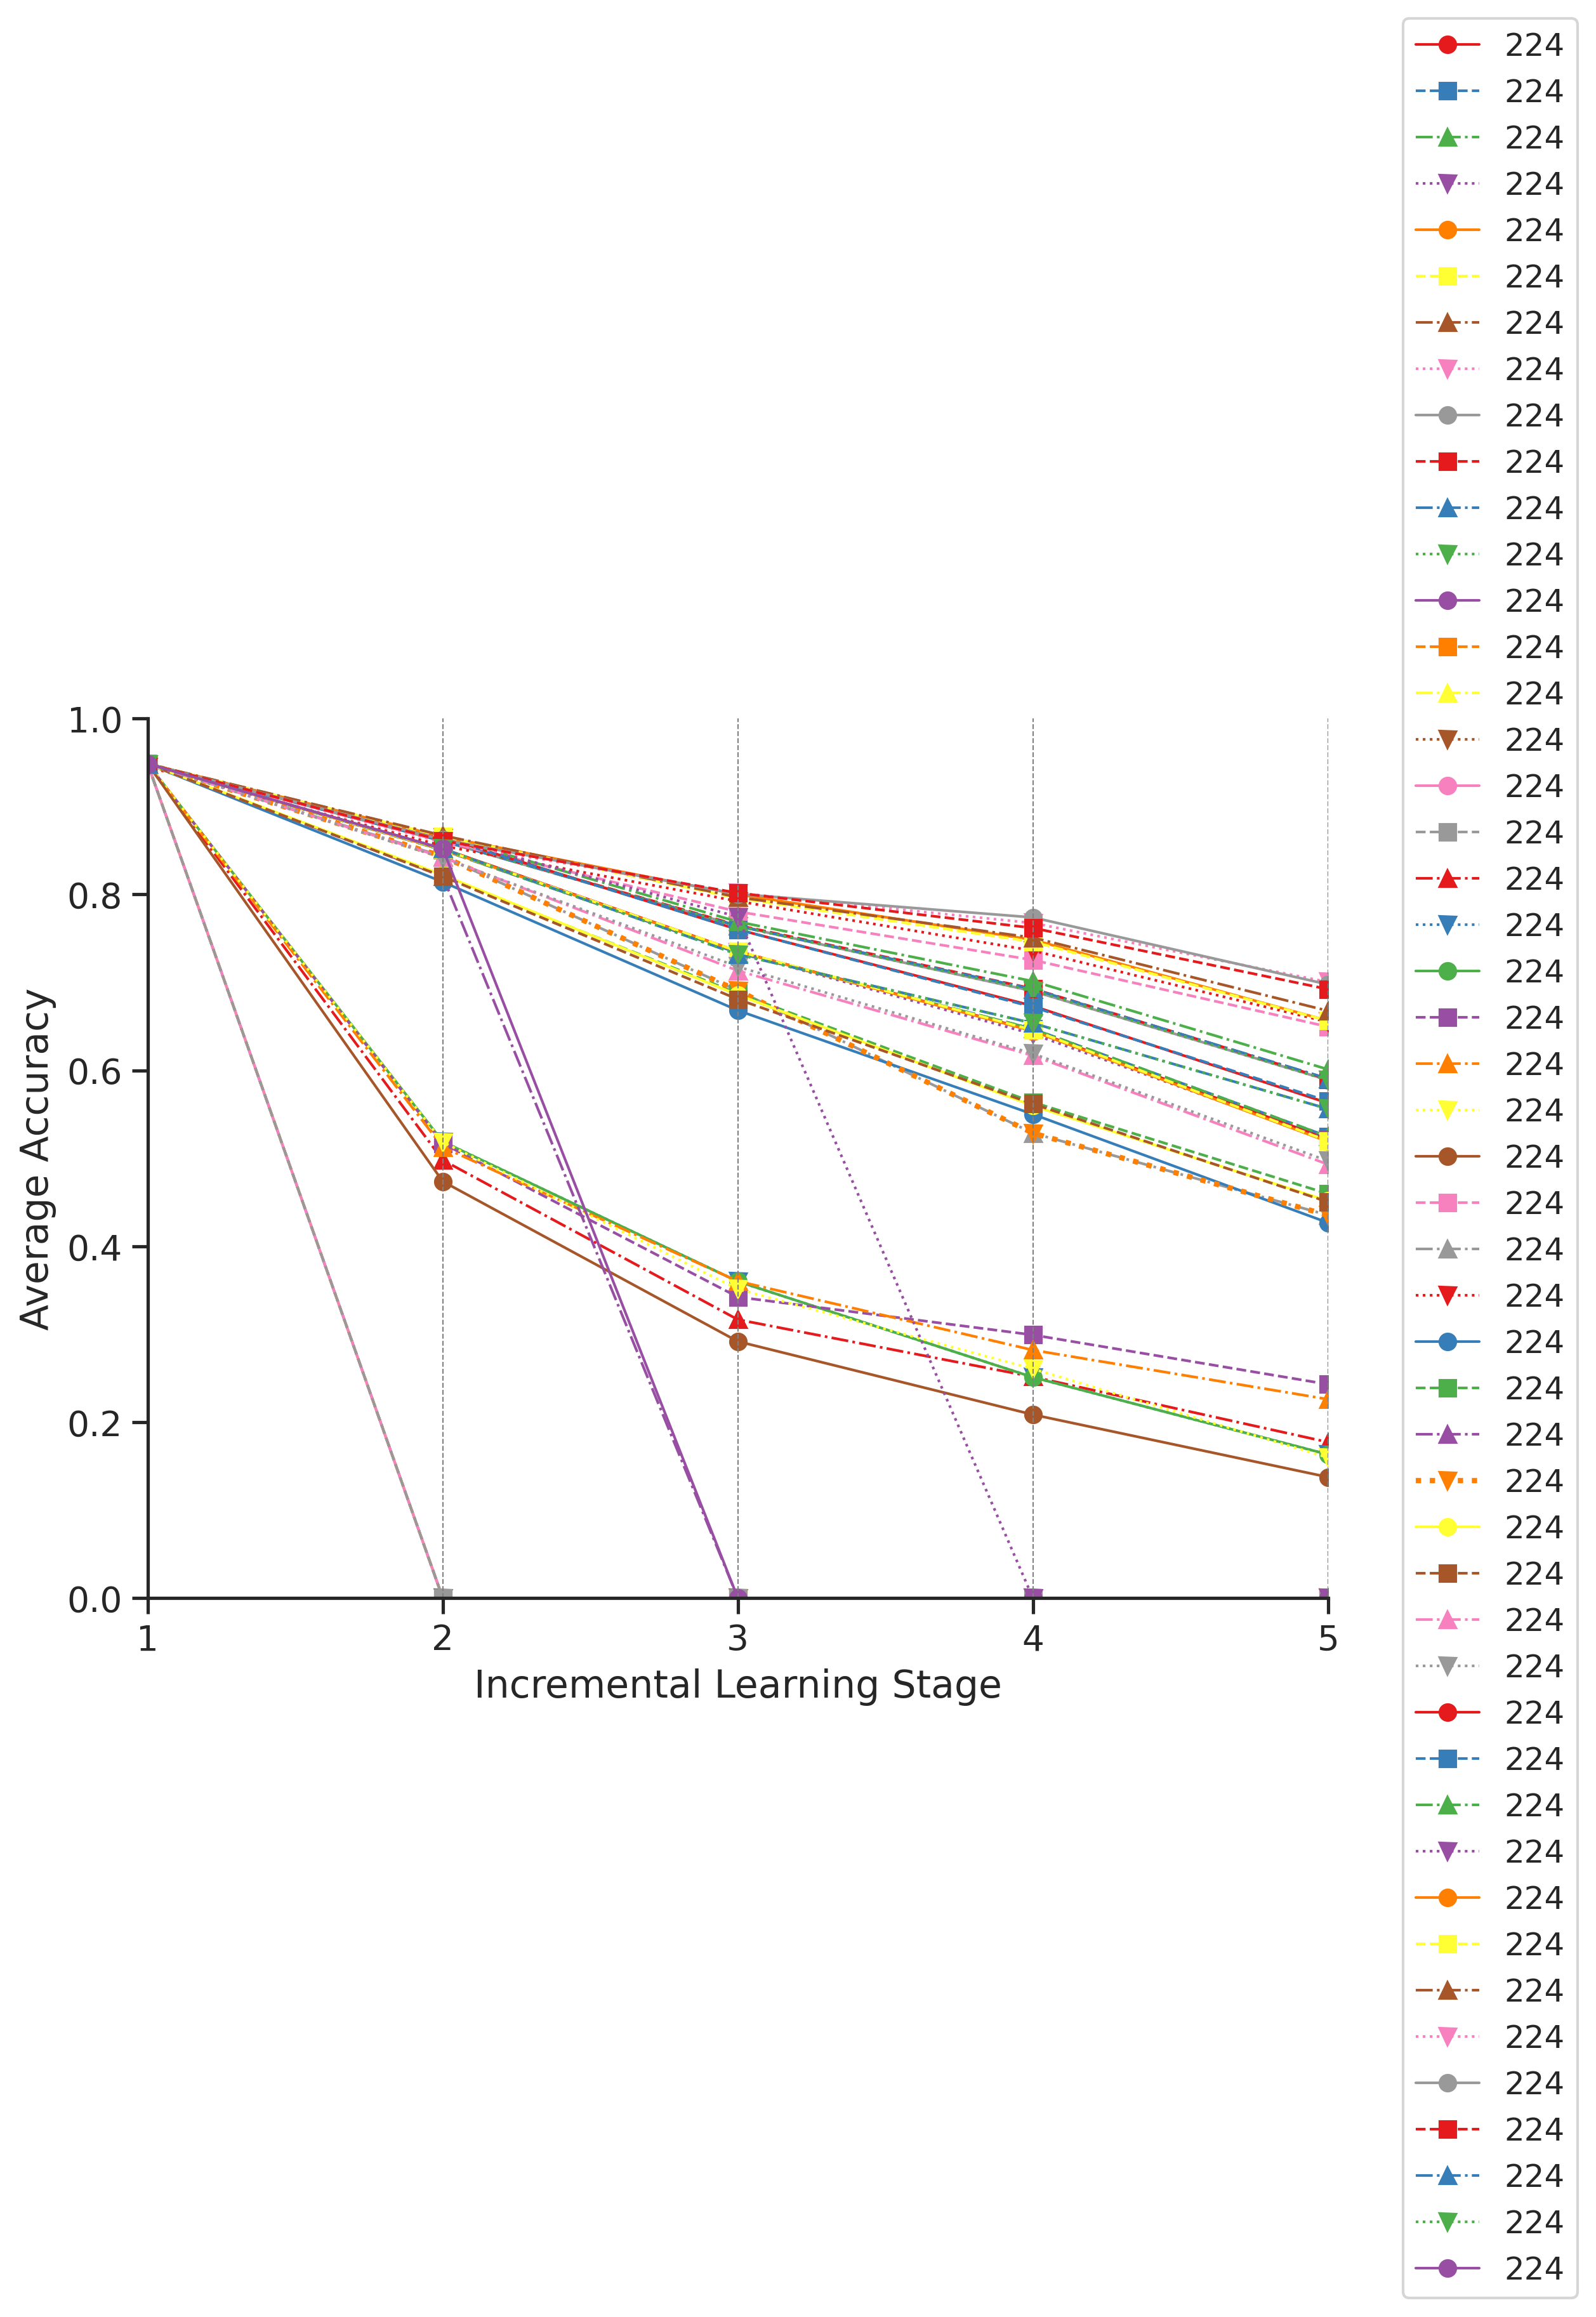

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import mplcyberpunk
from matplotlib.lines import Line2D

# 获取当前日期
now = datetime.now()
date_string = now.strftime("%Y-%m-%d")

# 读取CSV文件
df = pd.read_csv(result_filename)

# 设置画布大小和分辨率
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)

# 使用seaborn设置专业风格
sns.set(style="ticks", font_scale=1.2)

# 绘制平滑曲线
x = range(1, df.shape[1])
labels = []
linestyles = ['-', '--', '-.', ':']  # 虚线样式列表
markerstyles = ['o', 's', '^', 'v']  # 端点标记样式列表
colors = sns.color_palette("Set1", n_colors=len(df))  # 从Seaborn调色板获取颜色列表
lines = []  # 存储Line2D对象
for i, row in df.iterrows():
    method = row['Method']
    values = row[1:].tolist()[:df.shape[1]-1]  # 去掉最后一列
    linestyle = linestyles[i % len(linestyles)]
    markerstyle = markerstyles[i % len(markerstyles)]
    color = colors[i]
    
    if "oewc" in method:
        linewidth = 2  # 设置线条粗细为2
    else:
        linewidth = 1  # 使用默认线条粗细
    
    line, = plt.plot(x, values, label=method, lw=linewidth, linestyle=linestyle, marker=markerstyle, color=color)
    lines.append(line)
    labels.append(method.split('_')[1])  # 获取label值中第一个_和第二个_之间的部分

# 设置 X 和 Y 轴的范围
plt.xlim(1, df.shape[1]-1)
plt.ylim(0, 1)

# 设置X轴刻度标签为整数
plt.xticks(range(1, df.shape[1]), range(1, df.shape[1]))

# 添加标签
plt.xlabel('Incremental Learning Stage')  # 设置X轴标题
plt.ylabel('Average Accuracy')  # 设置Y轴标题

# 创建图例
legend_elements = [Line2D([0], [0], color=line.get_color(), linestyle=line.get_linestyle(),
                          marker=line.get_marker(), lw=line.get_linewidth())
                   for line in lines]
plt.legend(legend_elements, labels, loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize='small')

# 增加每个X轴上的列分割线
for val in range(1, df.shape[1]):
    plt.axvline(x=val, linestyle='--', color='gray', linewidth=0.5)

# 移除顶部和右侧的边框
sns.despine()

# 使用mplcyberpunk样式装饰图形，创建医学风格
# mplcyberpunk.add_glow_effects()

# 保存为矢量图格式（PDF、EPS，或SVG）以获得更高质量的输出
plt.savefig(f'curve_plot_{date_string}.pdf', format='pdf', dpi=300, bbox_inches='tight')

# 显示图形
plt.show()
